In [16]:
# image_loss.py 
# Author: Sasika Amarasinghe (amarasingheywsp.21@uom.lk)

from PIL import Image
import numpy as np

In [4]:
# Open an image file
img = Image.open('./sample.jpg')  # Replace 'image_file.jpg' with your image file


In [5]:
# Get the mode of the image
mode = img.mode

# Check if the mode indicates grayscale or RGB
if mode == 'RGB':
    print("The image is in RGB mode.")
elif mode == 'L':
    print("The image is in grayscale mode.")
else:
    print(f"The image is in mode: {mode}")


The image is in RGB mode.


In [6]:

# Get the size of the image
width, height = img.size
print(f"The image size is: {width} x {height}")


The image size is: 240 x 240


In [7]:

# Get the format of the image
format = img.format
print(f"The image format is: {format}")


The image format is: JPEG


In [9]:

# Get the image palette
palette = img.getpalette()
print(f"The image palette is: {palette}")

The image palette is: None


In [10]:

# Get the image histogram
histogram = img.histogram()
print(f"The image histogram is: {histogram}")

The image histogram is: [37, 48, 68, 63, 71, 60, 65, 92, 96, 95, 94, 82, 99, 107, 98, 160, 194, 497, 641, 1057, 1216, 1076, 1288, 1165, 1075, 747, 589, 434, 410, 374, 342, 376, 275, 281, 262, 206, 220, 216, 190, 213, 186, 164, 195, 161, 176, 180, 155, 157, 146, 144, 172, 173, 173, 160, 152, 169, 132, 136, 155, 145, 165, 166, 148, 171, 162, 163, 168, 181, 192, 217, 179, 188, 223, 191, 210, 204, 192, 196, 203, 174, 207, 206, 212, 201, 217, 220, 221, 250, 229, 247, 224, 247, 235, 200, 217, 206, 213, 194, 184, 204, 175, 188, 172, 159, 163, 137, 130, 147, 139, 137, 146, 128, 126, 116, 132, 124, 111, 116, 124, 113, 119, 110, 119, 97, 118, 96, 108, 90, 94, 89, 100, 110, 98, 83, 92, 105, 110, 87, 90, 93, 126, 125, 105, 93, 115, 87, 118, 100, 120, 103, 87, 122, 98, 142, 106, 151, 106, 100, 95, 108, 119, 86, 79, 99, 97, 92, 100, 105, 85, 111, 120, 98, 109, 102, 110, 101, 116, 119, 148, 138, 115, 117, 133, 130, 109, 147, 129, 135, 122, 127, 136, 120, 110, 123, 111, 109, 135, 154, 145, 146, 156, 1

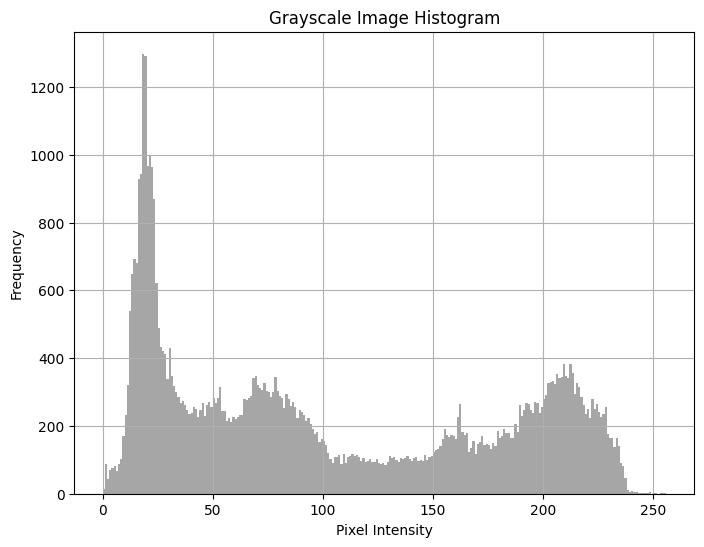

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
img = Image.open('./sample.jpg')  # Replace 'image_file.jpg' with your image file

# Convert the image to grayscale if needed
img_gray = img.convert('L')  # 'L' mode converts to grayscale

# Get pixel values as a list of intensities for grayscale images
pixel_values = list(img_gray.getdata())

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=256, range=(0, 256), density=False, color='gray', alpha=0.7)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()


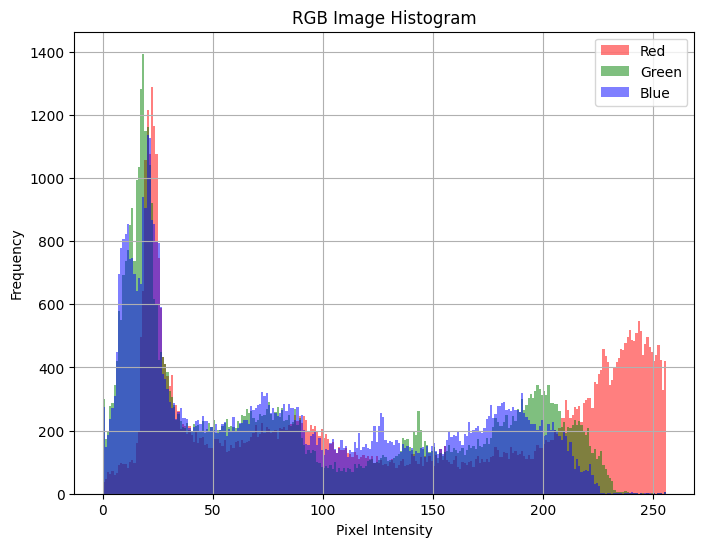

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
img = Image.open('./sample.jpg')  # Replace 'image_file.jpg' with your image file

# Split the image into its red, green, and blue channels
r, g, b = img.split()

# Plot histograms for each channel
plt.figure(figsize=(8, 6))
plt.hist(r.getdata(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red')
plt.hist(g.getdata(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green')
plt.hist(b.getdata(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue')
plt.title('RGB Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


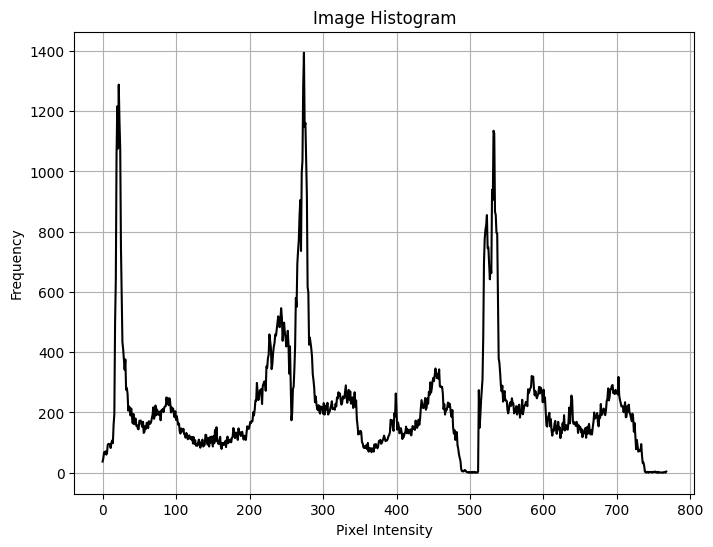

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
img = Image.open('./sample.jpg')  # Replace 'image_file.jpg' with your image file

# Get the histogram data using img.histogram()
histogram = img.histogram()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()


___
## Image Loss Calculation

In [21]:
transmitted_image = Image.open("./transmitted_image.jpg")
received_image = Image.open("./received_image.jpg")

In [25]:
transmitted_image_array = np.array(transmitted_image)

In [23]:
# Get the mode of the image
trans_img_mode = transmitted_image.mode

# Check if the mode indicates grayscale or RGB
if trans_img_mode == 'RGB':
    print("The transmitted image is in RGB mode.")
elif trans_img_mode == 'L':
    print("The transmitted image is in grayscale mode.")
else:
    print(f"The transmitted image is in mode: {trans_img_mode}")


The transmitted image is in RGB mode.


In [37]:
total_loss = 0

In [36]:
if trans_img_mode == "RGB":
    # Split the image into its red, green, and blue channels
    r_trans, g_trans, b_trans = transmitted_image.split()
    r_rec, g_rec, b_rec = received_image.split()

    # Convet image channels to numpy arrays
    r_trans_pix, g_trans_pix, b_trans_pix = np.array(r_trans), np.array(g_trans), np.array(b_trans)
    r_rec_pix, g_rec_pix, b_rec_pix = np.array(r_rec), np.array(g_rec), np.array(b_rec)

    r_diff = r_trans_pix - r_rec_pix
    g_diff = g_trans_pix - g_rec_pix
    b_diff = b_trans_pix - b_rec_pix

    r_loss = np.sum(r_diff ** 2)
    g_loss = np.sum(g_diff ** 2)
    b_loss = np.sum(b_diff ** 2)

    total_loss = r_loss + g_loss + b_loss


elif trans_img_mode == "L":
    grayscale_trans_pix = np.array(transmitted_image)
    grayscale_rec_pix = np.array(received_image)

    total_loss = np.sum((grayscale_trans_pix - grayscale_rec_pix) ** 2)


In [38]:
total_loss

0